<a href="https://colab.research.google.com/github/LizCoker/MyColabs/blob/main/fifa22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Soccer/Football is a sport that millions of people in the world are active enthusiasts. Several of the players have big fan bases for one or more attributes which make them stand out of the crowd. Coaches and Team managers are often on the lookout for the best players that can improve their chances at their various leagues. It will be helpful to know what attributes and distinct features are important to look at when making these big decisions.

This analysis seeks to investigate a distinct attribute amongst these players that probably make them more valuable above the others. The attribute in question here will be the players' preferred playing foot. 

The analysis seeks to answer the following questions:
Among the Top 1000 players;
1. Can we establish any correlation between overall attribute and players wages?
2. Is there a significant difference in the average overall attribute between players that play with the left foot and those that play with right foot.
3. Do left-footers make significantly higher wages than right-footers?

Based on the above questions, the hypotheses for this analysis are as follows:
Among the Top 1000
1. There is no correlation between players overall attribute and players wages.
2. Left-footers' average overall attribute are not significantly different from that of right-footers.
3. The average wages between left-footers and right-footers are not significantly different.
 

# Import Relevant Modules

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import math
from scipy.io import arff
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Load Data

This dataset is gotten from kaggle.com at the following [link](https://www.kaggle.com/datasets/stefanoleone992/fifa-22-complete-player-dataset?select=players_22.csv) and it contains data for 19,239 male players for the Career Mode FIFA 22 ("players_22.csv"). 

In [2]:
fifa_df = pd.read_csv('/content/gdrive/MyDrive/players_22.csv')

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (25,108) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# Inspect Dataset

In [3]:
fifa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Columns: 110 entries, sofifa_id to nation_flag_url
dtypes: float64(16), int64(44), object(50)
memory usage: 16.1+ MB


In [4]:
fifa_df.sofifa_id = fifa_df['sofifa_id'].astype(str) # converting the id to type string so it wont be measured as an integer
fifa_df.describe()

,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_level,club_jersey_number,...,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
count,19239.000000,19239.000000,1.916500e+04,19178.000000,19239.000000,19239.000000,19239.000000,19178.000000,19178.000000,19178.000000,...,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,2132.000000
mean,65.772182,71.079370,2.850452e+06,9017.989363,25.210822,181.299704,74.943032,50580.498123,1.354364,20.945250,...,57.929830,46.601746,48.045584,45.906700,16.406102,16.192474,16.055356,16.229274,16.491814,36.439962
std,6.880232,6.086213,7.613700e+06,19470.176724,4.748235,6.863179,7.069434,54401.868535,0.747865,17.909369,...,12.159326,20.200807,21.232718,20.755683,17.574028,16.839528,16.564554,17.059779,17.884833,10.751563
min,47.000000,49.000000,9.000000e+03,500.000000,16.000000,155.000000,49.000000,1.000000,1.000000,1.000000,...,12.000000,4.000000,5.000000,5.000000,2.000000,2.000000,2.000000,2.000000,2.000000,15.000000
25%,61.000000,67.000000,4.750000e+05,1000.000000,21.000000,176.000000,70.000000,479.000000,1.000000,9.000000,...,50.000000,29.000000,28.000000,25.000000,8.000000,8.000000,8.000000,8.000000,8.000000,27.000000
50%,66.000000,71.000000,9.750000e+05,3000.000000,25.000000,181.000000,75.000000,1938.000000,1.000000,18.000000,...,59.000000,52.000000,56.000000,53.000000,11.000000,11.000000,11.000000,11.000000,11.000000,36.000000
75%,70.000000,75.000000,2.000000e+06,8000.000000,29.000000,186.000000,80.000000,111139.000000,1.000000,27.000000,...,66.000000,63.000000,65.000000,63.000000,14.000000,14.000000,14.000000,14.000000,14.000000,45.000000
max,93.000000,95.000000,1.940000e+08,350000.000000,54.000000,206.000000,110.000000,115820.000000,5.000000,99.000000,...,96.000000,93.000000,93.000000,92.000000,91.000000,92.000000,93.000000,92.000000,90.000000,65.000000


In [5]:
fifa_df.head()

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png


The dataset contains 19239 rows and 110 columns. At this point, whether we have missing data or not has not been revealed.

There exists so many unhelpful columns in the dataset as relating to this analysis

# Cleaning the data

In this analysis, the variables that will be included out of the available 110 are:
1. sofifa_id 
2. short_name
3. overall
4. value_eur
5. wage_eur
6. preferred_foot

In [6]:
# Selection of columns that will be used in this analysis
fifa_new_df = fifa_df.iloc[:, [0,2,5,7,8,27]]
print(fifa_new_df.head())
print(fifa_new_df.info())

  sofifa_id         short_name  overall    value_eur  wage_eur preferred_foot
0    158023           L. Messi       93   78000000.0  320000.0           Left
1    188545     R. Lewandowski       92  119500000.0  270000.0          Right
2     20801  Cristiano Ronaldo       91   45000000.0  270000.0          Right
3    190871          Neymar Jr       91  129000000.0  270000.0          Right
4    192985       K. De Bruyne       91  125500000.0  350000.0          Right
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sofifa_id       19239 non-null  object 
 1   short_name      19239 non-null  object 
 2   overall         19239 non-null  int64  
 3   value_eur       19165 non-null  float64
 4   wage_eur        19178 non-null  float64
 5   preferred_foot  19239 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 902.0+ KB


In [7]:
null_rows = fifa_new_df[fifa_new_df.isnull().any(axis=1)]
null_rows

,sofifa_id,short_name,overall,value_eur,wage_eur,preferred_foot
147,184087,T. Alderweireld,83,NaN,NaN,Right
416,197242,G. Krychowiak,80,NaN,NaN,Right
694,187607,A. Dzyuba,78,NaN,NaN,Right
926,200094,M. Ozdoev,77,NaN,NaN,Right
1146,154950,Y. Zhirkov,76,NaN,NaN,Left
...,...,...,...,...,...,...
14654,241475,P. Soiri,61,NaN,NaN,Right
16209,254704,K. Miura,59,NaN,700.0,Right
16505,2702,K. Ellison,58,NaN,2000.0,Left
16506,29118,S. Ono,58,NaN,800.0,Right


It can be observed from the above output that there exists null values in the value_eur and wage_eur columns. The rows affected are only 74, and some of them overlap on the two affected columns. For this reason, it is safe to drop all affected rows from the data.

In [8]:
# dropping rows in the columns with missing/null values
fifa_cleaned_df = fifa_new_df.dropna(subset=['value_eur', 'wage_eur'])

# Inspecting the cleaned data

In [9]:
fifa_cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19165 entries, 0 to 19238
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sofifa_id       19165 non-null  object 
 1   short_name      19165 non-null  object 
 2   overall         19165 non-null  int64  
 3   value_eur       19165 non-null  float64
 4   wage_eur        19165 non-null  float64
 5   preferred_foot  19165 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 1.0+ MB


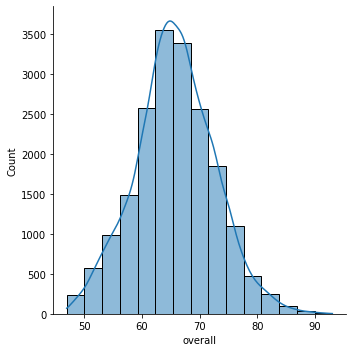

In [10]:
overall_dist = sns.displot(fifa_cleaned_df.overall, bins=15, kde=True)

The above chart shows that the overall attribute variable is normally distributed

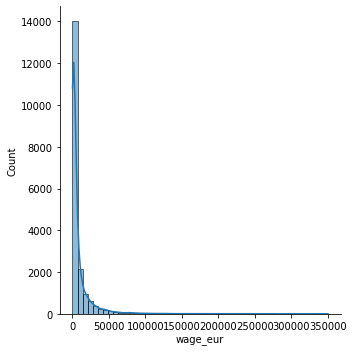

In [11]:
wage_dist = sns.displot(fifa_cleaned_df.wage_eur, bins=50, kde=True)

From the the above chart, it can be observed that the wage_eur distribution is right-skewed, meaning there are more observations/players around the lower wage brackets, while there is more sparse distribution as the wages go higher

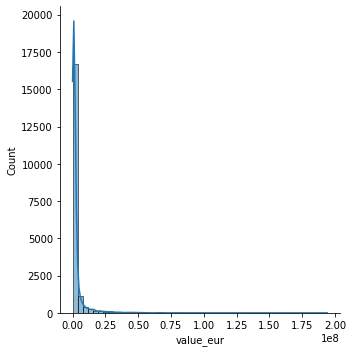

In [12]:
value_dist = sns.displot(fifa_cleaned_df.value_eur, bins=50, kde=True)

Just like with the wage_eur distribution, the value distribution is right-skewed

# Analysing the whole Data

## Correlation

(0.6018855422270709, 0.0)


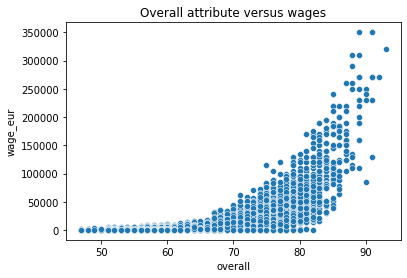

In [13]:
print(stats.pearsonr(fifa_cleaned_df.overall, fifa_cleaned_df.wage_eur))
sns.scatterplot(x='overall', y='wage_eur', data = fifa_cleaned_df)
plt.title('Overall attribute versus wages')
plt.show()

The above test and chart show that at the 0.05 significant level, overall attribute and wages are significantly and positvely correlated at 0.602 coeffecient. This result applies to the entire dataset regardless of how high the overall attribute is, or how high the players wages are.

(0.5546840457911443, 0.0)


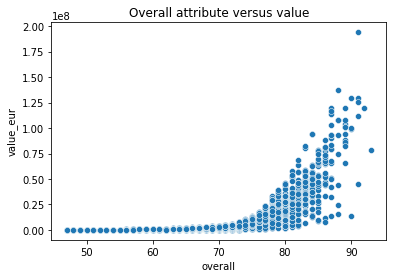

In [14]:
print(stats.pearsonr(fifa_cleaned_df.overall, fifa_cleaned_df.value_eur))
sns.scatterplot(x='overall', y='value_eur', data = fifa_cleaned_df)
plt.title('Overall attribute versus value')
plt.show()

Similar to the result of the test done on the wage_eur, the value_eur variable also shows that there is significant positive correlation between overall attribute and players' value. Here also, the result applies to the entire dataset of all 19165 players.

## Independent-samples t-test

In [15]:
# Dichotomizing the data to have two separate tables containing 
#Left-foot players in one, and Right-foot players in the other
fifa_left = fifa_cleaned_df[fifa_cleaned_df['preferred_foot'] =='Left']
fifa_right = fifa_cleaned_df[fifa_cleaned_df['preferred_foot'] =='Right']

[4549, 14616]
['Left', 'Right']


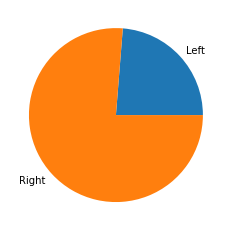

In [16]:
fifa_pie_data = list(fifa_cleaned_df.preferred_foot.value_counts(ascending=True))
print(fifa_pie_data)

fifa_pie_label = list(fifa_cleaned_df.preferred_foot.unique())
print(fifa_pie_label)

plt.pie(fifa_pie_data, labels = fifa_pie_label)

plt.show()

The result and chart above shows clearly that the data contains about 3 times as many left footers as there are right footers. This proves that left footers are not as common to come by as right footers.

Ttest_indResult(statistic=6.848119331127106, pvalue=7.709488731690644e-12)
66.36975159375687
65.57047071702245


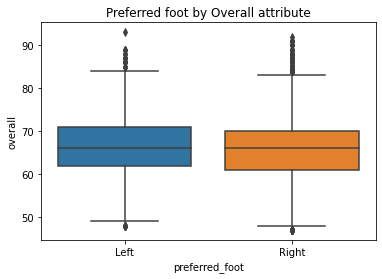

In [17]:
print(stats.ttest_ind(fifa_left.overall, fifa_right.overall))
print(fifa_left.overall.mean())
print(fifa_right.overall.mean())
sns.boxplot(y="overall", x="preferred_foot", data=fifa_cleaned_df)
plt.title('Preferred foot by Overall attribute')
plt.show()

The t-test result shows that at the 0.05 significant level, left footers' average overall attribute is significantly higher than right-footers' average overall attribute

The boxplot appears to corroborate the t-test result that left-footers' average attribute is higher than right-footers' average attribute

Ttest_indResult(statistic=2.325117983570726, pvalue=0.020076040958633252)
9607.990767201583
8839.254926108375


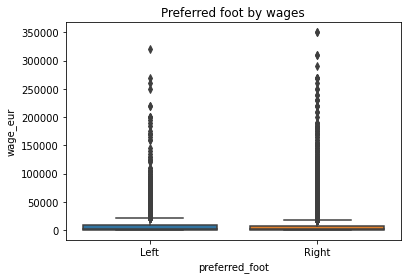

In [18]:
print(stats.ttest_ind(fifa_left.wage_eur, fifa_right.wage_eur))
print(fifa_left.wage_eur.mean())
print(fifa_right.wage_eur.mean())
sns.boxplot(y="wage_eur", x="preferred_foot", data=fifa_cleaned_df)
plt.title('Preferred foot by wages')
plt.show()

Ttest_indResult(statistic=2.773236766416532, pvalue=0.005555536667847213)
3123795.339635085
2765377.94198139


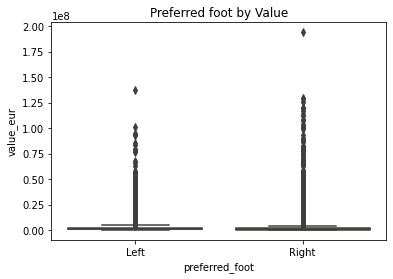

In [19]:
print(stats.ttest_ind(fifa_left.value_eur, fifa_right.value_eur))
print(fifa_left.value_eur.mean())
print(fifa_right.value_eur.mean())
sns.boxplot(y="value_eur", x="preferred_foot", data=fifa_cleaned_df)
plt.title('Preferred foot by Value')
plt.show()

For both the wage_eur and value_eur variables, the t-test shows that there is significant difference in the respective wages and value between left footers and right footers. 

However, because of the skewdness of the data that was earlier observed in the distribution histogram, so many outliers can be seen in the boxplot here which makes it a little harder to read, or make any meaningful conclusions on.

# **Testing of Hypothesis**: *Analysing the data for the Top 1000 by overall attribute*

In [20]:
# Sort the data by the overall attribute column
fifa_1000 = fifa_cleaned_df.sort_values(by=['overall'], ascending=False)

# Limit the data to the Top 1000
fifa_1000 = fifa_1000[:1000]
fifa_1000.head(10)

,sofifa_id,short_name,overall,value_eur,wage_eur,preferred_foot
0,158023,L. Messi,93,78000000.0,320000.0,Left
1,188545,R. Lewandowski,92,119500000.0,270000.0,Right
2,20801,Cristiano Ronaldo,91,45000000.0,270000.0,Right
3,190871,Neymar Jr,91,129000000.0,270000.0,Right
4,192985,K. De Bruyne,91,125500000.0,350000.0,Right
5,200389,J. Oblak,91,112000000.0,130000.0,Right
6,231747,K. Mbappé,91,194000000.0,230000.0,Right
7,167495,M. Neuer,90,13500000.0,86000.0,Right
8,192448,M. ter Stegen,90,99000000.0,250000.0,Right
9,202126,H. Kane,90,129500000.0,240000.0,Right


## Inspecting the fifa_1000 data

In [21]:
print(fifa_1000.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 910
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sofifa_id       1000 non-null   object 
 1   short_name      1000 non-null   object 
 2   overall         1000 non-null   int64  
 3   value_eur       1000 non-null   float64
 4   wage_eur        1000 non-null   float64
 5   preferred_foot  1000 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 54.7+ KB
None


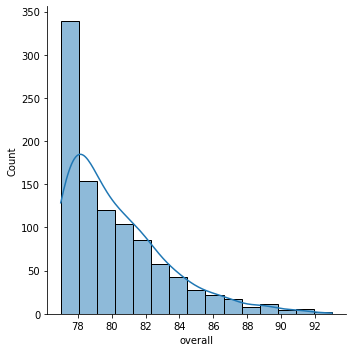

In [22]:
overall_1000_dist = sns.displot(fifa_1000.overall, bins=15, kde=True)

The chart above appears to be skewed to the right. This is in contrast to the normal distribution that the actual fifa_cleaned_df showed. Even though it is hard to conclude whether this is a normal distribution or not, we can still run analysis on it because we have well over 100 observations to run our tests on, based on the assumptions of Central Limit Theorem

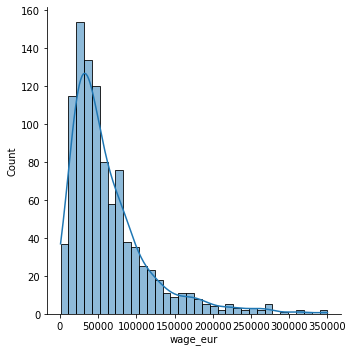

In [23]:
wage_1000_dist = sns.displot(fifa_1000.wage_eur, kde=True)

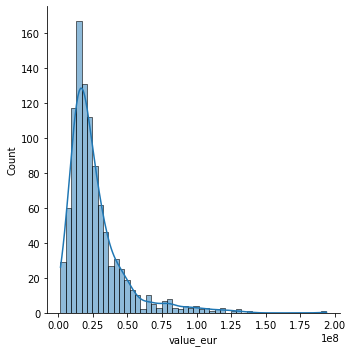

In [24]:
value_1000_dist = sns.displot(fifa_1000.value_eur, bins=50, kde=True)

For the wage and value variables, the distributions have a normal distribution as seen in the above charts, even though they are still right skewed, a bell shaped curve can be observed. The data/variables are good enough to run our analysis on.

## Hypothesis 1:
There is no Correlation between overall attribute and players wages

(0.7428170216908134, 4.231995646528006e-176)


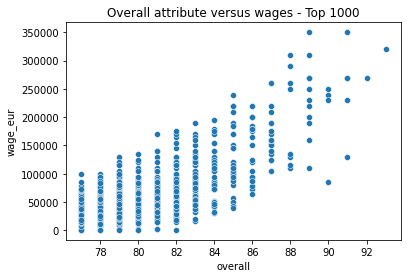

In [25]:
print(stats.pearsonr(fifa_1000.overall, fifa_1000.wage_eur))
sns.scatterplot(x='overall', y='wage_eur', data = fifa_1000)
plt.title('Overall attribute versus wages - Top 1000')
plt.show()


(0.7767249022842275, 1.3915279635238708e-202)


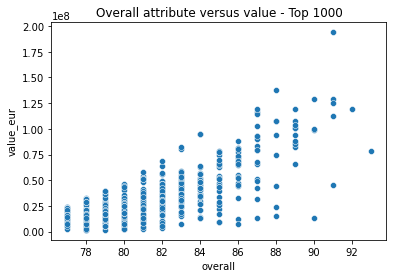

In [26]:
print(stats.pearsonr(fifa_1000.overall, fifa_1000.value_eur))
sns.scatterplot(x='overall', y='value_eur', data = fifa_1000)
plt.title('Overall attribute versus value - Top 1000')
plt.show()


## Result of Hypothesis 1:
The correlation coeffecient of overall attribute and value(0.78), just like that of overall attribute and wages(0.74) shows that among the Top 1000 players, there is positive correlation in the two relationships respectively. The p-value at less than 0.05 significant level also shows that the correlation is significant. 

This means that as the overall attribute of a player goes up, the more likely it is that the value and wages will go up.

## Hypothesis 2:
Left-footers average overall attribute are not significantly different from that of right footers

In [27]:
# Create two tables for left footers and right-footers respectively
fifa_1000_left = fifa_1000[fifa_1000['preferred_foot'] =='Left']
fifa_1000_right = fifa_1000[fifa_1000['preferred_foot'] =='Right']

[259, 741]
['Left', 'Right']


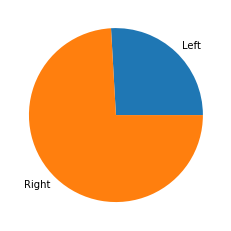

In [28]:
fifa_1000_data = list(fifa_1000.preferred_foot.value_counts(ascending=True))
print(fifa_1000_data)

fifa_1000_label = list(fifa_1000.preferred_foot.unique())
print(fifa_1000_label)

plt.pie(fifa_1000_data, labels = fifa_1000_label)

plt.show()

Similar to the full dataset, left-footers are fewer than right footers in an almost 1:3 ratio

Ttest_indResult(statistic=-0.47142700608059845, pvalue=0.6374388720778827)
80.24710424710425
80.34817813765183


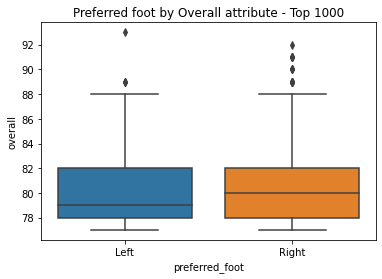

In [29]:
print(stats.ttest_ind(fifa_1000_left.overall, fifa_1000_right.overall))
print(fifa_1000_left.overall.mean())
print(fifa_1000_right.overall.mean())
sns.boxplot(y="overall", x="preferred_foot", data=fifa_1000)
plt.title('Preferred foot by Overall attribute - Top 1000')
plt.show()

## Result of Hypothesis 2:
The p-value returned at 0.64 is higher than 0.05 significance level. This shows that there is no significant difference in the average overall attribute between left footers and right footers among the top 1000 players.

## Hypothesis 3:
There is no significant difference between left-footers' and right-footers' average wages and values among the Top 1000 players

Ttest_indResult(statistic=-0.524074916528265, pvalue=0.6003428000787006)
61015.444015444016
62994.4669365722


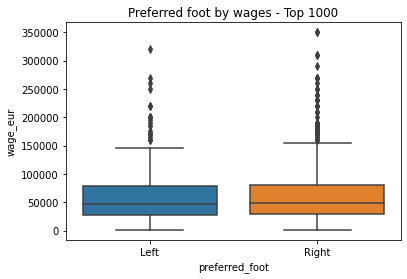

In [30]:
print(stats.ttest_ind(fifa_1000_left.wage_eur, fifa_1000_right.wage_eur))
print(fifa_1000_left.wage_eur.mean())
print(fifa_1000_right.wage_eur.mean())
sns.boxplot(y="wage_eur", x="preferred_foot", data=fifa_1000)
plt.title('Preferred foot by wages - Top 1000')
plt.show()

Ttest_indResult(statistic=0.6035436897017147, pvalue=0.5462842062423419)
27303474.903474905
26382456.14035088


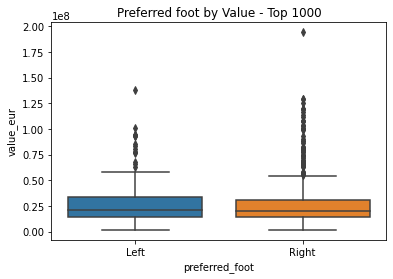

In [31]:
print(stats.ttest_ind(fifa_1000_left.value_eur, fifa_1000_right.value_eur))
print(fifa_1000_left.value_eur.mean())
print(fifa_1000_right.value_eur.mean())
sns.boxplot(y="value_eur", x="preferred_foot", data=fifa_1000)
plt.title('Preferred foot by Value - Top 1000')
plt.show()

## Result of Hypothesis 3:
At 0.05 significance level, the p-values for preferred foot to wages(0.6) and value(0.55) are higher, therefore there is no significant difference in the observed averages between left-footers wages/values and right-footers' wages/values.

# In summary, the analysis noted the following observations:
The initial analysis of all players inclusive showed 
1. Positive significant correlation between wages and players overall attribute
2. Significant difference between left-footers and right-footers as regards overall attribute
3. Significant difference between left-footers and right-footers as regards wages and value

The analysis on the Top 1000 showed
1. Positive correlation between wages/value and players overall attribute, similar to the initial analysis of all players inclusive
2. No significant difference between left-footers' and right-footers' overall attribute
3. No significant difference between left-footers and right-footers as regards wages and value



# CONCLUSION
It can be said that left footers generally have an edge/advantage over right-footers at the initial or beginning stages of the players' career based on their wages and overall attribute. Left-footers are rare compared to right-footers, and this may be a reason for their wages being higher at the initial stages.

However, as the players rise in their career, that advantage disappears and the difference in attribute and wages can no longer be linked to their preferred foot. The observed differences in wages, value, and overall attribute among the Top 1000 may be due to other confounding factors that can be investigated in further analysis. 

# RECOMMENDATION
Coaches may be inclined to looking out for left footers to add to their soccer team, this will be helpful only if the player is fresh, young and teachable. All things being equal, a left-footer will be slightly more talented or more at an advantage over right footers which may reduce the cost of time, energy and resources on the team. Subject to further analysis.

However, if a coach wants to buy a Top rated player to join their team, it is recommended not to base their decision on the player's preferred foot because at that top stage, players wages, attribute, form, and what they can offer are not affected by this factor of preferred-foot anymore.

Further analysis can be done to look for other confounding factors that can make a players' wages go higher or lower. Some of these factors may include the league in which they play, the club they play for, the player's age or how long their career has been, their state of physical form, or even the position they play in the team. 

# THANK YOU FOR READING